In [14]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats as sp
#results = pickle.load(open('spatial_cat_1_halfTW.pkl','rb'))
results = pickle.load(open('spatial_cat_1_WTLossHalfTW0.25InN.pkl','rb'))
num_time_steps = len(np.arange(-80,160,20))
flash_color=np.array(results['trial_info']['flash_color'])
flash_zone=np.array(results['trial_info']['flash_zone'])
fz_val=[0,1,-1]
ind_fcz_temp=np.zeros((6,1))
count=0
for fz in range(3):
    for fc in range(2):
        ind_fcz_temp[count,0]=len(np.where((flash_color==fc)*(flash_zone==fz_val[fz]))[0])
        count=count+1
            
num_time_steps = len(np.arange(-80,160,20))
tuning_results = {
    'neuronal_mean_gtarget_tc'      : np.zeros((100,  num_time_steps,np.int(ind_fcz_temp[0])), dtype=np.float32),
    'neuronal_mean_rtarget_tc'      : np.zeros((100,  num_time_steps,np.int(ind_fcz_temp[3])), dtype=np.float32),
    'neuronal_mean_gnontarget_tc'   : np.zeros((100,  num_time_steps,np.int(ind_fcz_temp[4])), dtype=np.float32),
    'neuronal_mean_rnontarget_tc'   : np.zeros((100,  num_time_steps,np.int(ind_fcz_temp[5])), dtype=np.float32),
    'neuronal_mean_ginrnontarget_tc': np.zeros((100,  num_time_steps,np.int(ind_fcz_temp[2])), dtype=np.float32),
    'neuronal_mean_ringnontarget_tc': np.zeros((100,  num_time_steps,np.int(ind_fcz_temp[1])), dtype=np.float32)}


flash_color=np.array(results['trial_info']['flash_color'])
flash_zone=np.array(results['trial_info']['flash_zone'])
fz_val=[0,1,-1]
h=np.stack(results['h'],axis=1)
for n in range(100):
    for fz in range(3):
        for fc in range(2):
            ind_fcz=np.where((flash_color==fc)*(flash_zone==fz_val[fz]))
            f_ind=(250+500+np.dot(ind_fcz[1],160)-80)//20
            l_ind=(250+500+np.dot(ind_fcz[1]+1,160))//20
            k=np.zeros((len(range(f_ind[0],l_ind[0])), len(f_ind)),dtype=np.float32)
            for ind in range(len(f_ind)):
                k[:,ind]=h[n,f_ind[ind]:l_ind[ind],ind_fcz[0][ind]]

            if fc==0 and fz_val[fz]==0: #green flash in green zone
                tuning_results['neuronal_mean_gtarget_tc'][n,:,:]=k
            elif fc==1 and fz_val[fz]==1: #red flash in red zone
                tuning_results['neuronal_mean_rtarget_tc'][n,:,:]=k
            elif fc==0 and fz_val[fz]==-1: #green flash in NRNG zone
                tuning_results['neuronal_mean_gnontarget_tc'][n,:,:]=k
            elif fc==1 and fz_val[fz]==-1: #red flash in NRNG zone
                tuning_results['neuronal_mean_rnontarget_tc'][n,:,:]=k
            elif fc==0 and fz_val[fz]==1: #green flash in red zone
                tuning_results['neuronal_mean_ginrnontarget_tc'][n,:,:]=k
            elif fc==1 and fz_val[fz]==0: #red flash in green zone
                tuning_results['neuronal_mean_ringnontarget_tc'][n,:,:]=k

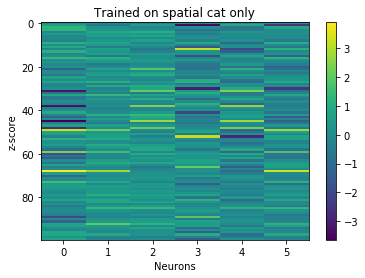

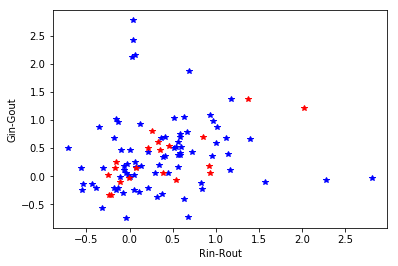

In [16]:
#full time period of flash
nm_gtz=np.mean(tuning_results['neuronal_mean_gtarget_tc'],axis=1) #mean over axis=1 which is time
nm_rtz=np.mean(tuning_results['neuronal_mean_rtarget_tc'],axis=1)

nm_gntz=np.mean(tuning_results['neuronal_mean_gnontarget_tc'],axis=1) 
nm_rntz=np.mean(tuning_results['neuronal_mean_rnontarget_tc'],axis=1)

nm_ginrttz=np.mean(tuning_results['neuronal_mean_ginrnontarget_tc'],axis=1)
nm_ringttz=np.mean(tuning_results['neuronal_mean_ringnontarget_tc'],axis=1)

#mean
mnm_gtz=np.mean(nm_gtz,axis=1) #mean over axis=1 which is trials
mnm_rtz=np.mean(nm_rtz,axis=1)

mnm_gntz=np.mean(nm_gntz,axis=1)
mnm_rntz=np.mean(nm_rntz,axis=1)

mnm_ginrttz=np.mean(nm_ginrttz,axis=1)
mnm_ringttz=np.mean(nm_ringttz,axis=1)

#var
vnm_gtz=np.var(nm_gtz,axis=1) #variance over axis=1 which is trials
vnm_rtz=np.var(nm_rtz,axis=1)

vnm_gntz=np.var(nm_gntz,axis=1)
vnm_rntz=np.var(nm_rntz,axis=1)

vnm_ginrttz=np.var(nm_ginrttz,axis=1)
vnm_ringttz=np.var(nm_ringttz,axis=1)

z=np.zeros((100, 6), dtype=np.float32)
z[:,0]=(mnm_rtz-mnm_gtz)/(1e-09+np.sqrt((vnm_rtz+vnm_gtz)/2)) #rin-gin
z[:,1]=(mnm_rtz-mnm_rntz)/(1e-09+np.sqrt((vnm_rtz+vnm_rntz)/2)) #rin-rout
z[:,2]=(mnm_gtz-mnm_gntz)/(1e-09+np.sqrt((vnm_gtz+vnm_gntz)/2)) #gin-gout
z[:,3]=(mnm_ginrttz-mnm_ringttz)/(1e-09+np.sqrt((vnm_ginrttz+vnm_ringttz)/2)) #ring-ginr
z[:,4]=(mnm_gtz-mnm_ginrttz)/(1e-09+np.sqrt((vnm_gtz+vnm_ginrttz)/2)) #gin-ginr
z[:,5]=(mnm_rtz-mnm_ringttz)/(1e-09+np.sqrt((vnm_rtz+vnm_ringttz)/2)) #rin-ring

plt.imshow(z,aspect='auto')
plt.colorbar()
#plt.savefig('w_in.png',bbox_inches='tight')
plt.xlabel('Neurons')
plt.ylabel('z-score')
plt.title('Trained on spatial cat only')
plt.show()

plt.plot(z[:80,1],z[:80,2],'b*')
plt.plot(z[80:,1],z[80:,2],'r*')
plt.xlabel('Rin-Rout')
plt.ylabel('Gin-Gout')
plt.show()

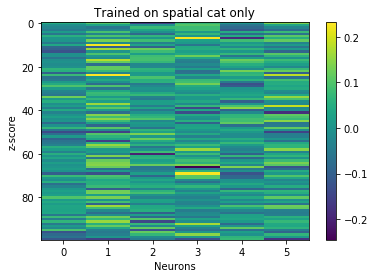

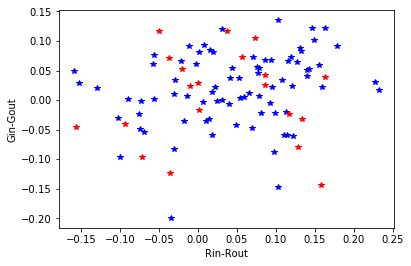

In [17]:
#baseline/fixation period of flash
nm_gtz=np.mean(tuning_results['neuronal_mean_gtarget_tc'][:,:4,:],axis=1)
nm_rtz=np.mean(tuning_results['neuronal_mean_rtarget_tc'][:,:4,:],axis=1)

nm_gntz=np.mean(tuning_results['neuronal_mean_gnontarget_tc'][:,:4,:],axis=1)
nm_rntz=np.mean(tuning_results['neuronal_mean_rnontarget_tc'][:,:4,:],axis=1)

nm_ginrttz=np.mean(tuning_results['neuronal_mean_ginrnontarget_tc'][:,:4,:],axis=1)
nm_ringttz=np.mean(tuning_results['neuronal_mean_ringnontarget_tc'][:,:4,:],axis=1)

#mean
mnm_gtz=np.mean(nm_gtz,axis=1)
mnm_rtz=np.mean(nm_rtz,axis=1)

mnm_gntz=np.mean(nm_gntz,axis=1)
mnm_rntz=np.mean(nm_rntz,axis=1)

mnm_ginrttz=np.mean(nm_ginrttz,axis=1)
mnm_ringttz=np.mean(nm_ringttz,axis=1)

#var
vnm_gtz=np.var(nm_gtz,axis=1)
vnm_rtz=np.var(nm_rtz,axis=1)

vnm_gntz=np.var(nm_gntz,axis=1)
vnm_rntz=np.var(nm_rntz,axis=1)

vnm_ginrttz=np.var(nm_ginrttz,axis=1)
vnm_ringttz=np.var(nm_ringttz,axis=1)

z=np.zeros((100, 6), dtype=np.float32)
z[:,0]=(mnm_rtz-mnm_gtz)/(1e-02+np.sqrt((vnm_rtz+vnm_gtz)/2)) #rin-gin
z[:,1]=(mnm_rtz-mnm_rntz)/(1e-02+np.sqrt((vnm_rtz+vnm_rntz)/2)) #rin-rout
z[:,2]=(mnm_gtz-mnm_gntz)/(1e-02+np.sqrt((vnm_gtz+vnm_gntz)/2)) #gin-gout
z[:,3]=(mnm_ginrttz-mnm_ringttz)/(1e-02+np.sqrt((vnm_ginrttz+vnm_ringttz)/2)) #ring-ginr
z[:,4]=(mnm_gtz-mnm_ginrttz)/(1e-02+np.sqrt((vnm_gtz+vnm_ginrttz)/2)) #gin-ginr
z[:,5]=(mnm_rtz-mnm_ringttz)/(1e-02+np.sqrt((vnm_rtz+vnm_ringttz)/2)) #rin-ring

plt.imshow(z,aspect='auto')
plt.colorbar()
#plt.savefig('w_in.png',bbox_inches='tight')
plt.xlabel('Neurons')
plt.ylabel('z-score')
plt.title('Trained on spatial cat only')
plt.show()

plt.plot(z[:80,1],z[:80,2],'b*')
plt.plot(z[80:,1],z[80:,2],'r*')
plt.xlabel('Rin-Rout')
plt.ylabel('Gin-Gout')
plt.show()

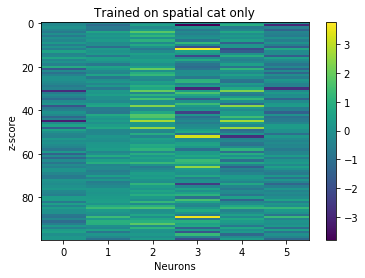

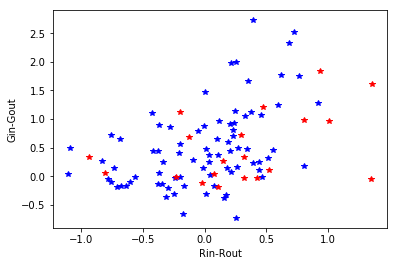

In [18]:
#early part of flash
nm_gtz=np.mean(tuning_results['neuronal_mean_gtarget_tc'][:,5:8,:],axis=1)
nm_rtz=np.mean(tuning_results['neuronal_mean_rtarget_tc'][:,:5:8,:],axis=1)

nm_gntz=np.mean(tuning_results['neuronal_mean_gnontarget_tc'][:,5:8,:],axis=1)
nm_rntz=np.mean(tuning_results['neuronal_mean_rnontarget_tc'][:,5:8,:],axis=1)

nm_ginrttz=np.mean(tuning_results['neuronal_mean_ginrnontarget_tc'][:,5:8,:],axis=1)
nm_ringttz=np.mean(tuning_results['neuronal_mean_ringnontarget_tc'][:,5:8,:],axis=1)

#mean
mnm_gtz=np.mean(nm_gtz,axis=1)
mnm_rtz=np.mean(nm_rtz,axis=1)

mnm_gntz=np.mean(nm_gntz,axis=1)
mnm_rntz=np.mean(nm_rntz,axis=1)

mnm_ginrttz=np.mean(nm_ginrttz,axis=1)
mnm_ringttz=np.mean(nm_ringttz,axis=1)

#var
vnm_gtz=np.var(nm_gtz,axis=1)
vnm_rtz=np.var(nm_rtz,axis=1)

vnm_gntz=np.var(nm_gntz,axis=1)
vnm_rntz=np.var(nm_rntz,axis=1)

vnm_ginrttz=np.var(nm_ginrttz,axis=1)
vnm_ringttz=np.var(nm_ringttz,axis=1)

z=np.zeros((100, 6), dtype=np.float32)
z[:,0]=(mnm_rtz-mnm_gtz)/(1e-01+np.sqrt((vnm_rtz+vnm_gtz)/2)) #rin-gin
z[:,1]=(mnm_rtz-mnm_rntz)/(1e-01+np.sqrt((vnm_rtz+vnm_rntz)/2)) #rin-rout
z[:,2]=(mnm_gtz-mnm_gntz)/(1e-01+np.sqrt((vnm_gtz+vnm_gntz)/2)) #gin-gout
z[:,3]=(mnm_ginrttz-mnm_ringttz)/(1e-01+np.sqrt((vnm_ginrttz+vnm_ringttz)/2)) #ring-ginr
z[:,4]=(mnm_gtz-mnm_ginrttz)/(1e-01+np.sqrt((vnm_gtz+vnm_ginrttz)/2)) #gin-ginr
z[:,5]=(mnm_rtz-mnm_ringttz)/(1e-01+np.sqrt((vnm_rtz+vnm_ringttz)/2)) #rin-ring

plt.imshow(z,aspect='auto')
plt.colorbar()
#plt.savefig('w_in.png',bbox_inches='tight')
plt.xlabel('Neurons')
plt.ylabel('z-score')
plt.title('Trained on spatial cat only')
plt.show()

plt.plot(z[:80,1],z[:80,2],'b*')
plt.plot(z[80:,1],z[80:,2],'r*')
plt.xlabel('Rin-Rout')
plt.ylabel('Gin-Gout')
plt.show()

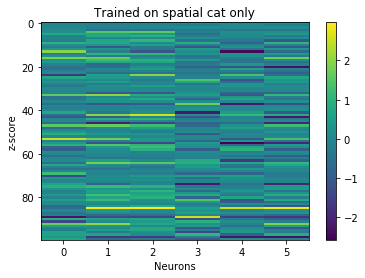

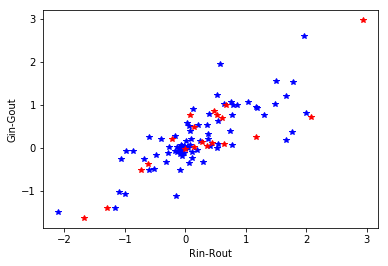

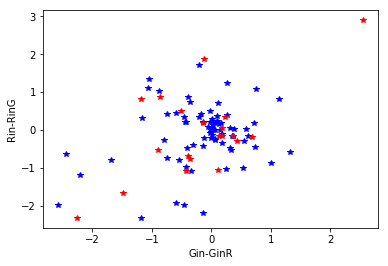

In [19]:
#late part of the neuronal response after flash off
nm_gtz=np.mean(tuning_results['neuronal_mean_gtarget_tc'][:,-2:,:],axis=1)
nm_rtz=np.mean(tuning_results['neuronal_mean_rtarget_tc'][:,-2:,:],axis=1)

nm_gntz=np.mean(tuning_results['neuronal_mean_gnontarget_tc'][:,-2:,:],axis=1)
nm_rntz=np.mean(tuning_results['neuronal_mean_rnontarget_tc'][:,-2:,:],axis=1)

nm_ginrttz=np.mean(tuning_results['neuronal_mean_ginrnontarget_tc'][:,-2:,:],axis=1)
nm_ringttz=np.mean(tuning_results['neuronal_mean_ringnontarget_tc'][:,-2:,:],axis=1)

#mean
mnm_gtz=np.mean(nm_gtz,axis=1)
mnm_rtz=np.mean(nm_rtz,axis=1)

mnm_gntz=np.mean(nm_gntz,axis=1)
mnm_rntz=np.mean(nm_rntz,axis=1)

mnm_ginrttz=np.mean(nm_ginrttz,axis=1)
mnm_ringttz=np.mean(nm_ringttz,axis=1)

#var
vnm_gtz=np.var(nm_gtz,axis=1)
vnm_rtz=np.var(nm_rtz,axis=1)

vnm_gntz=np.var(nm_gntz,axis=1)
vnm_rntz=np.var(nm_rntz,axis=1)

vnm_ginrttz=np.var(nm_ginrttz,axis=1)
vnm_ringttz=np.var(nm_ringttz,axis=1)

z=np.zeros((100, 6), dtype=np.float32)
z[:,0]=(mnm_rtz-mnm_gtz)/(1e-03+np.sqrt((vnm_rtz+vnm_gtz)/2)) #rin-gin
z[:,1]=(mnm_rtz-mnm_rntz)/(1e-03+np.sqrt((vnm_rtz+vnm_rntz)/2)) #rin-rout
z[:,2]=(mnm_gtz-mnm_gntz)/(1e-03+np.sqrt((vnm_gtz+vnm_gntz)/2)) #gin-gout
z[:,3]=(mnm_ginrttz-mnm_ringttz)/(1e-03+np.sqrt((vnm_ginrttz+vnm_ringttz)/2)) #ring-ginr
z[:,4]=(mnm_gtz-mnm_ginrttz)/(1e-03+np.sqrt((vnm_gtz+vnm_ginrttz)/2)) #gin-ginr
z[:,5]=(mnm_rtz-mnm_ringttz)/(1e-03+np.sqrt((vnm_rtz+vnm_ringttz)/2)) #rin-ring

plt.imshow(z,aspect='auto')
plt.colorbar()
#plt.savefig('w_in.png',bbox_inches='tight')
plt.xlabel('Neurons')
plt.ylabel('z-score')
plt.title('Trained on spatial cat only')
plt.show()

plt.plot(z[:80,1],z[:80,2],'b*')
plt.plot(z[80:,1],z[80:,2],'r*')
plt.xlabel('Rin-Rout')
plt.ylabel('Gin-Gout')
plt.show()

plt.plot(z[:80,4],z[:80,5],'b*')
plt.plot(z[80:,4],z[80:,5],'r*')
plt.xlabel('Gin-GinR')
plt.ylabel('Rin-RinG')
#plt.ylim([-5, 5])
plt.show()


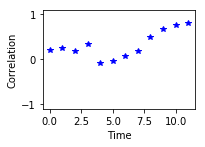

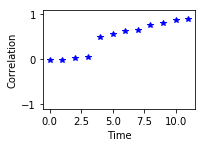

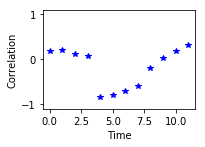

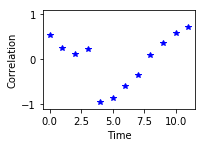

In [20]:
#time course of correlation between z(RI,RO) and z(GI,GO)
rio_gio_corr=np.zeros((4,np.shape(tuning_results['neuronal_mean_gnontarget_tc'])[1]))
rio_gio_pval=np.zeros((4,np.shape(tuning_results['neuronal_mean_gnontarget_tc'])[1]))

for tp in range(np.shape(tuning_results['neuronal_mean_gnontarget_tc'])[1]):
    nm_gtz=np.mean(tuning_results['neuronal_mean_gtarget_tc'][:,tp,:],axis=1)
    nm_rtz=np.mean(tuning_results['neuronal_mean_rtarget_tc'][:,tp,:],axis=1)

    nm_gntz=np.mean(tuning_results['neuronal_mean_gnontarget_tc'][:,tp,:],axis=1)
    nm_rntz=np.mean(tuning_results['neuronal_mean_rnontarget_tc'][:,tp,:],axis=1)

    nm_ginrttz=np.mean(tuning_results['neuronal_mean_ginrnontarget_tc'][:,tp,:],axis=1)
    nm_ringttz=np.mean(tuning_results['neuronal_mean_ringnontarget_tc'][:,tp,:],axis=1)

    #mean
    #mnm_gtz=np.mean(nm_gtz,axis=1)
    #mnm_rtz=np.mean(nm_rtz,axis=1)

    #mnm_gntz=np.mean(nm_gntz,axis=1)
    #mnm_rntz=np.mean(nm_rntz,axis=1)

    #mnm_ginrttz=np.mean(nm_ginrttz,axis=1)
    #mnm_ringttz=np.mean(nm_ringttz,axis=1)

    #var
    vnm_gtz=np.var(tuning_results['neuronal_mean_gtarget_tc'][:,tp,:],axis=1)
    vnm_rtz=np.var(tuning_results['neuronal_mean_rtarget_tc'][:,tp,:],axis=1)

    vnm_gntz=np.var(tuning_results['neuronal_mean_gnontarget_tc'][:,tp,:],axis=1)
    vnm_rntz=np.var(tuning_results['neuronal_mean_rnontarget_tc'][:,tp,:],axis=1)

    vnm_ginrttz=np.var(tuning_results['neuronal_mean_ginrnontarget_tc'][:,tp,:],axis=1)
    vnm_ringttz=np.var(tuning_results['neuronal_mean_ringnontarget_tc'][:,tp,:],axis=1)

    z=np.zeros((100, 6), dtype=np.float32)
    z[:,0]=(nm_rtz-nm_gtz)/(1e-03+np.sqrt((vnm_rtz+vnm_gtz)/2)) #rin-gin
    z[:,1]=(nm_rtz-nm_rntz)/(1e-03+np.sqrt((vnm_rtz+vnm_rntz)/2)) #rin-rout
    z[:,2]=(nm_gtz-nm_gntz)/(1e-03+np.sqrt((vnm_gtz+vnm_gntz)/2)) #gin-gout
    z[:,3]=(nm_ginrttz-nm_ringttz)/(1e-03+np.sqrt((vnm_ginrttz+vnm_ringttz)/2)) #ring-ginr
    z[:,4]=(nm_gtz-nm_ginrttz)/(1e-03+np.sqrt((vnm_gtz+vnm_ginrttz)/2)) #gin-ginr
    z[:,5]=(nm_rtz-nm_ringttz)/(1e-03+np.sqrt((vnm_rtz+vnm_ringttz)/2)) #rin-ring
    
    rio_gio_corr[0,tp]=sp.pearsonr(z[:80,1],z[:80,2])[0]
    rio_gio_corr[1,tp]=sp.pearsonr(z[-20:,1],z[-20:,2])[0]
    rio_gio_corr[2,tp]=sp.pearsonr(z[:80,4],z[:80,5])[0]
    rio_gio_corr[3,tp]=sp.pearsonr(z[-20:,4],z[-20:,5])[0]
    
    rio_gio_pval[0,tp]=sp.pearsonr(z[:80,1],z[:80,2])[1]
    rio_gio_pval[1,tp]=sp.pearsonr(z[-20:,1],z[-20:,2])[1]
    rio_gio_pval[2,tp]=sp.pearsonr(z[:80,4],z[:80,5])[1]
    rio_gio_pval[3,tp]=sp.pearsonr(z[-20:,4],z[-20:,5])[1]

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(range(0,12),rio_gio_corr[i,:],'b*')
    plt.xlabel('Time')
    plt.ylabel('Correlation')
    plt.ylim([-1.1, 1.1])
    plt.show()



In [21]:
#Look at the connectivity matrix to see if neurons reponding to red zones have higher connectivity than neurons
#responding to green zones

nm_gtz=np.mean(tuning_results['neuronal_mean_gtarget_tc'][:,5:,:],axis=1)
nm_rtz=np.mean(tuning_results['neuronal_mean_rtarget_tc'][:,5:,:],axis=1)

nm_gntz=np.mean(tuning_results['neuronal_mean_gnontarget_tc'][:,5:,:],axis=1)
nm_rntz=np.mean(tuning_results['neuronal_mean_rnontarget_tc'][:,5:,:],axis=1)

nm_ginrttz=np.mean(tuning_results['neuronal_mean_ginrnontarget_tc'][:,5:,:],axis=1)
nm_ringttz=np.mean(tuning_results['neuronal_mean_ringnontarget_tc'][:,5:,:],axis=1)

#mean
mnm_gtz=np.mean(nm_gtz,axis=1)
mnm_rtz=np.mean(nm_rtz,axis=1)

mnm_gntz=np.mean(nm_gntz,axis=1)
mnm_rntz=np.mean(nm_rntz,axis=1)

mnm_ginrttz=np.mean(nm_ginrttz,axis=1)
mnm_ringttz=np.mean(nm_ringttz,axis=1)

#var
vnm_gtz=np.var(nm_gtz,axis=1)
vnm_rtz=np.var(nm_rtz,axis=1)

vnm_gntz=np.var(nm_gntz,axis=1)
vnm_rntz=np.var(nm_rntz,axis=1)

vnm_ginrttz=np.var(nm_ginrttz,axis=1)
vnm_ringttz=np.var(nm_ringttz,axis=1)



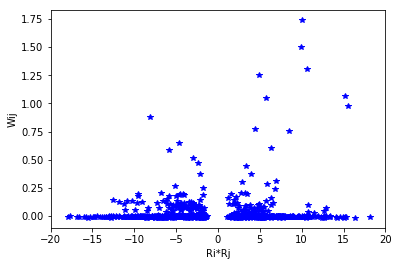

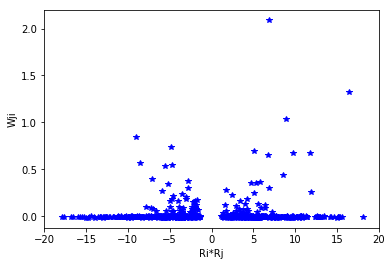

In [22]:
#calculate red-ness index - method 1

redness1_1=(mnm_rtz-mnm_ringttz)/(1e-03+np.sqrt((vnm_rtz+vnm_ringttz)/2)) #z(rin,ring)
redness1_2=(mnm_ginrttz-mnm_gtz)/(1e-03+np.sqrt((vnm_ginrttz+vnm_gtz)/2)) #z(ginr,gin)

redness1=redness1_1+redness1_2

ind_redness1=np.union1d(np.where(redness1>1)[0],np.where(redness1<-1)[0])
wt_rnn=results['weights']['w_rnn']


import itertools
npairs=list(itertools.combinations(ind_redness1,2))
rirj=np.zeros((len(npairs)))
wij=np.zeros((len(npairs)))
wji=np.zeros((len(npairs)))

for i in range(len(npairs)):
    n1=npairs[i][0]
    n2=npairs[i][1]
    
    rirj[i]=redness1[n1]*redness1[n2]
    wij[i]=wt_rnn[n1,n2]
    wji[i]=wt_rnn[n2,n1]
        
    
plt.plot(rirj,wij,'b*')
plt.xlabel('Ri*Rj')
plt.ylabel('Wij')
plt.xlim([-20, 20])
plt.show() 

plt.plot(rirj,wji,'b*')
plt.xlabel('Ri*Rj')
plt.ylabel('Wji')
plt.xlim([-20, 20])
plt.show() 



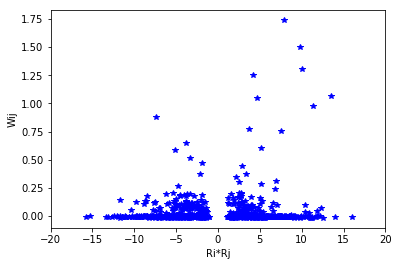

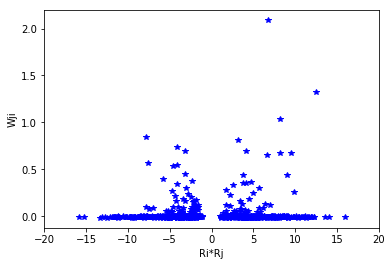

In [23]:
#calculate red-ness index - method 2

redness2_1=(mnm_rtz-mnm_gtz)/(1e-03+np.sqrt((vnm_rtz+vnm_gtz)/2)) #z(rin,gin)
redness2_2=(mnm_ginrttz-mnm_ringttz)/(1e-03+np.sqrt((vnm_ginrttz+vnm_ringttz)/2)) #z(ginr,ring)
redness2=redness2_1+redness2_2

ind_redness2=np.union1d(np.where(redness2>1)[0],np.where(redness2<-1)[0])
wt_rnn=results['weights']['w_rnn']


import itertools
npairs=list(itertools.combinations(ind_redness2,2))
rirj=np.zeros((len(npairs)))
wij=np.zeros((len(npairs)))
wji=np.zeros((len(npairs)))

for i in range(len(npairs)):
    n1=npairs[i][0]
    n2=npairs[i][1]
    
    rirj[i]=redness2[n1]*redness2[n2]
    wij[i]=wt_rnn[n1,n2]
    wji[i]=wt_rnn[n2,n1]
        
    
plt.plot(rirj,wij,'b*')
plt.xlabel('Ri*Rj')
plt.ylabel('Wij')
plt.xlim([-20, 20])
plt.show() 

plt.plot(rirj,wji,'b*')
plt.xlabel('Ri*Rj')
plt.ylabel('Wji')
plt.xlim([-20, 20])
plt.show() 



In [13]:
w_pos=np.where(wij>0)
rpos=np.where(rirj<-1)

len(np.intersect1d(w_pos[0],rpos[0]))/len(w_pos[0])


0.54

In [ ]:
a=np.where(wji_g>0)
b=np.where(gigj>0)

len(a[0])